<a href="https://colab.research.google.com/github/Lebo1024/Risk-Analysis-of-Equity-Stocks/blob/master/Risk_Analysis_of_SUMBA_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Analyzing and Making Predictions of Tech Stocks
In this project, I will use pandas to analyze data, including value, risk and return metrics, of the prominent 'SUMBA' companies: Shopify, Uber, Microsoft, Alibaba and Advanced Micro Devices. Here are some of the questions I'll address in this notebook:


What was the change in our stock’s price over time?
What was the moving average of our stocks?
What was the daily return average of a stock?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future 'SUMBA'-stock behavior?

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c6cf19e115a211b38dbecff54eb6e499fe5651c246161ae6f21c13732cc4cd8d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

I will be comparing the five "SUMBA" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [3]:
stock_list = ['SHOP','UBER','MSFT','BABA','AMD']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Shopify in the previous year.

In [27]:
SHOP.describe()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,243.000000,228.000000,203.000000,251.000000
mean,845.108749,864.516414,822.905000,845.207659,845.207659,2.460671e+06,845.792181,846.734865,853.903243,0.004801
std,257.458836,259.495932,252.377106,255.642437,255.642437,1.436481e+06,247.432835,235.313434,209.505163,0.042692
min,326.339996,345.730011,305.299988,322.290009,322.290009,6.243000e+05,368.914999,394.410400,444.037598,-0.175518
25%,624.750000,645.399994,608.974976,629.570023,629.570023,1.446800e+06,643.687503,684.985204,686.681803,-0.018868
50%,933.369995,953.484985,906.289978,928.269989,928.269989,2.195150e+06,952.097992,973.322002,988.662998,0.003238
75%,1049.250000,1069.969971,1019.097504,1042.795044,1042.795044,3.129450e+06,1035.221011,1012.765001,1008.155599,0.028386
max,1275.000000,1285.185059,1209.546997,1277.079956,1277.079956,1.105070e+07,1188.776001,1175.565195,1098.029399,0.145475


In [28]:
SHOP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-27 to 2021-01-25
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              252 non-null    float64
 1   High              252 non-null    float64
 2   Low               252 non-null    float64
 3   Close             252 non-null    float64
 4   Adj Close         252 non-null    float64
 5   Volume            252 non-null    int64  
 6   MAvg for 10 days  243 non-null    float64
 7   MAvg for 25 days  228 non-null    float64
 8   MAvg for 50 days  203 non-null    float64
 9   Daily Return      251 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 21.7 KB


## Change in Stock Price Over Time

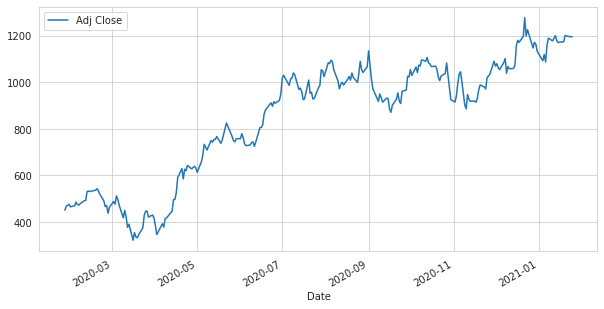

In [29]:
SHOP['Adj Close'].plot(legend = True, figsize = (10,5))


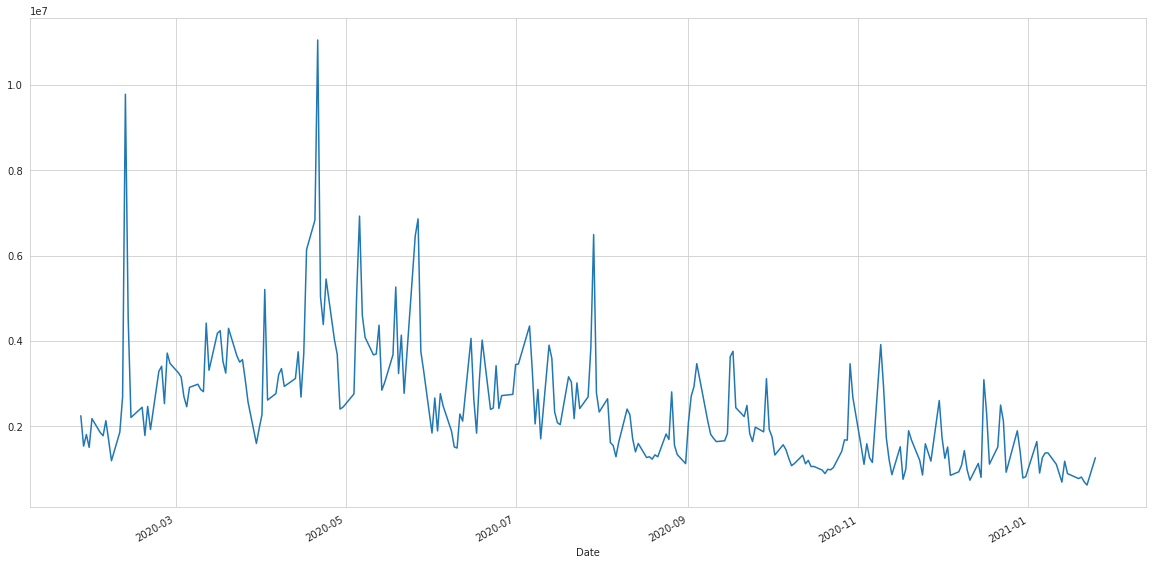

In [33]:
SHOP['Volume'].plot(legend = False, figsize = (20,10))

After a strong first quarter, Shopify stock prices have fluctuated around $1200 while its volume has decreased to around 400,000 shares per day. Now let's calculate a few different moving averages to smooth out variations in our data and obtain a better trend.

## Calculating Moving Averages

In [34]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    SHOP[label] = SHOP['Adj Close'].rolling(window = avg, center = False).mean()

In [35]:
SHOP.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2021-01-19,1186.900024,1190.660034,1150.170044,1173.969971,1173.969971,776500,1164.350000,1157.870000,1079.610000,0.002990
2021-01-20,1180.709961,1216.319946,1175.345947,1200.979980,1200.979980,811900,1172.573999,1163.594399,1082.899600,0.023007
2021-01-21,1214.000000,1216.250000,1181.000000,1198.150024,1198.150024,701100,1183.657996,1169.153599,1085.962600,-0.002356
2021-01-22,1187.520020,1201.609985,1177.156006,1196.699951,1196.699951,624300,1187.374988,1174.057598,1091.844600,-0.001210
2021-01-25,1206.160034,1247.449951,1165.500000,1195.000000,1195.000000,1263355,1187.982983,1175.565195,1098.029399,-0.001421


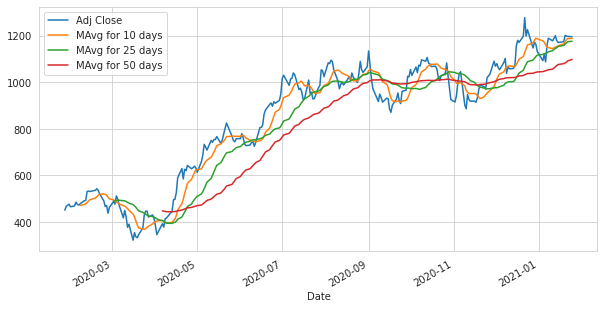

In [10]:
SHOP[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports our observation that Shopify's stock has remained consistent at $1200 for the past three months. This plot also reveals the approximate crossover points that tell us when Shopify's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Shopify's stock.

## Daily Return Averages.


In [36]:
#The daily return column can be created by using the percentage change over the adjusted closing price
SHOP['Daily Return'] = SHOP['Adj Close'].pct_change()
SHOP.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2021-01-19,1186.900024,1190.660034,1150.170044,1173.969971,1173.969971,776500,1164.350000,1157.870000,1079.610000,0.002990
2021-01-20,1180.709961,1216.319946,1175.345947,1200.979980,1200.979980,811900,1172.573999,1163.594399,1082.899600,0.023007
2021-01-21,1214.000000,1216.250000,1181.000000,1198.150024,1198.150024,701100,1183.657996,1169.153599,1085.962600,-0.002356
2021-01-22,1187.520020,1201.609985,1177.156006,1196.699951,1196.699951,624300,1187.374988,1174.057598,1091.844600,-0.001210
2021-01-25,1206.160034,1247.449951,1165.500000,1195.000000,1195.000000,1263355,1187.982983,1175.565195,1098.029399,-0.001421


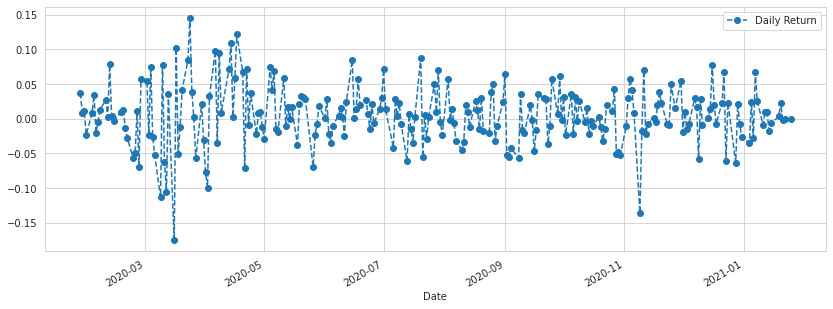

In [37]:
SHOP['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


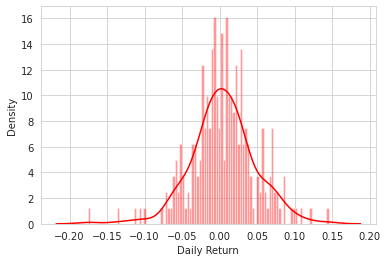

In [13]:
sns.distplot(SHOP['Daily Return'].dropna(),bins=100,color='red')

Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'SUMBA' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [38]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


,AMD,BABA,MSFT,SHOP,UBER
Date,,,,,
2021-01-19,0.014057,0.033640,0.017823,0.002990,0.014049
2021-01-20,-0.007826,0.054997,0.036500,0.023007,0.001421
2021-01-21,0.031324,-0.020679,0.002808,-0.002356,-0.010465
2021-01-22,0.013766,-0.005308,0.004356,-0.001210,-0.026528
2021-01-25,0.011693,0.008197,0.008099,-0.005749,-0.010830


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


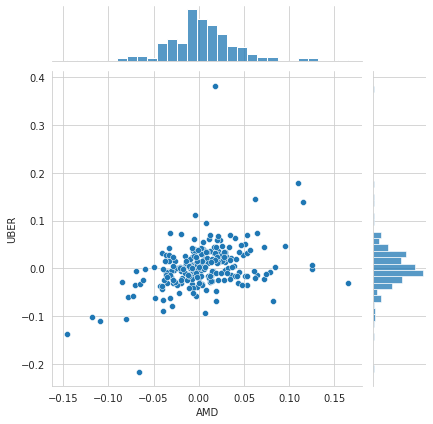

In [15]:
sns.jointplot('AMD','UBER',rets_compr,kind='scatter')

There seems to be a low correlation between Advanced Micro Devices and Uber returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

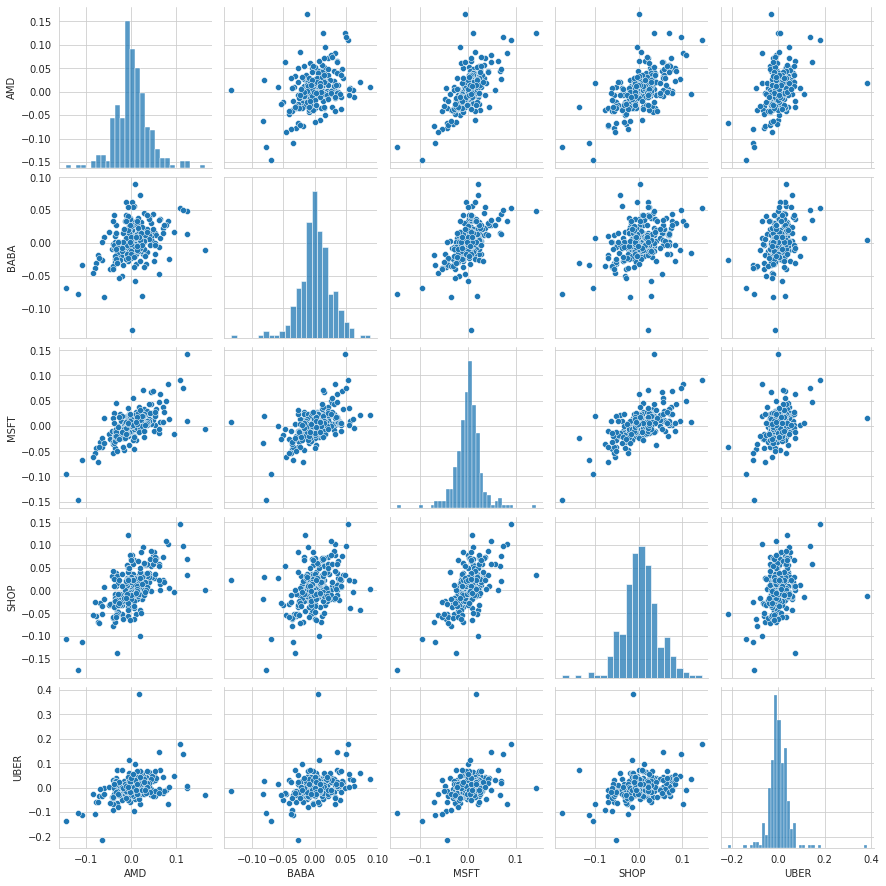

In [39]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Advanced Micro Devices and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

           AMD      BABA      MSFT      SHOP      UBER
AMD   1.000000  0.372675  0.675957  0.601969  0.386686
BABA  0.372675  1.000000  0.544710  0.355463  0.327181
MSFT  0.675957  0.544710  1.000000  0.639176  0.407751
SHOP  0.601969  0.355463  0.639176  1.000000  0.336427
UBER  0.386686  0.327181  0.407751  0.336427  1.000000


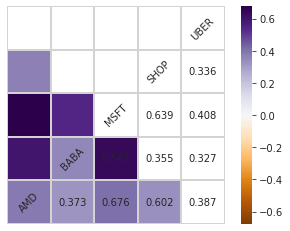

In [40]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that Microsoft and Advanced Micro Devices share a stronger correlation, and in general
Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'SUMBA' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

## Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

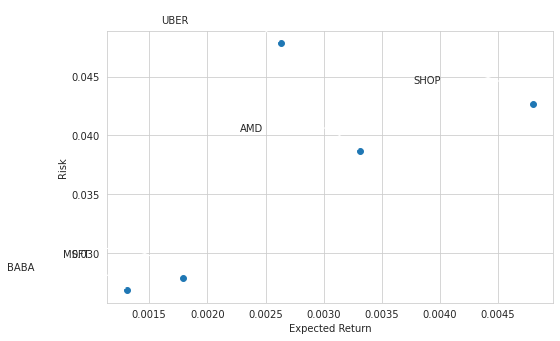

In [18]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=35)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.3'))

From this plot we can see that Shopify has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. Uber's performance is more concerning as it has lower positive expected return along with the highest risk.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Alibaba.

In [41]:
rets_compr.head()

,AMD,BABA,MSFT,SHOP,UBER
Date,,,,,
2020-01-27,NaN,NaN,NaN,NaN,NaN
2020-01-28,0.025782,0.023166,0.019596,0.036687,0.019559
2020-01-29,-0.059766,0.008515,0.015593,0.008575,-0.000540
2020-01-30,0.026731,-0.016225,0.028208,0.011046,-0.008381
2020-01-31,-0.036490,-0.009541,-0.014759,-0.023528,-0.010632


In [42]:
rets_compr['BABA'].quantile(q=0.05)


-0.03753763337235749

In [43]:
rets_compr['BABA'].quantile(q=0.01)



-0.07969428058914596

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 3.75 percent with 95% confidence and 7.96 percent with 99% confidence.

## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Alibaba's stock.

In [44]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['BABA']

sigma = rets_compr.std()['BABA']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Alibaba stocks. Here's the stock's opening values again.



In [45]:
BABA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,201.220001,208.020004,199.500000,205.470001,205.470001,24574700
2020-01-28,209.740005,210.910004,207.169998,210.229996,210.229996,16196700
2020-01-29,212.559998,213.979996,209.520004,212.020004,212.020004,12871900
2020-01-30,207.880005,209.860001,205.029999,208.580002,208.580002,14376000
2020-01-31,206.500000,207.929993,204.727997,206.589996,206.589996,18181400


Text(0.5, 1.0, 'Monte Carlo Analysis for Alibaba')

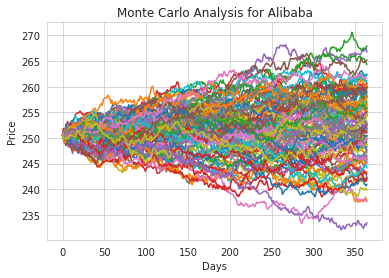

In [47]:
start_price = 250.50 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Alibaba')

Text(0.5, 1.0, 'Final price distribution for Alibaba Stock after 365 days')

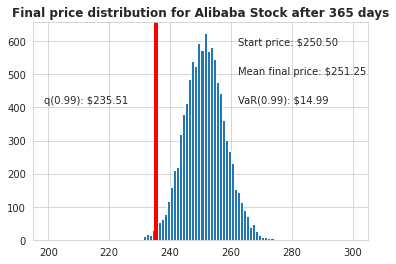

In [50]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=100,range = [200,300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Alibaba Stock after %s days" %days, weight='bold')

 Based off the histogram, we conclude that Alibaba's stock price is very stable as there is a $0.53 difference between start and mean price.


The value-at-risk of our investment is 14.99 for maximum low price of $235.51 with 99% confidence, which is approximately a 3.75% risk compared to the 7.96% we achieved via bootstrapping. 